In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_movie = pd.read_csv('/content/drive/MyDrive/Data/IMDb Movies India.csv (2).zip', encoding='latin1')
df_movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_movie.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [5]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
df_movie.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
# Data Preprocessing
df_movie = df_movie.dropna(subset=['Rating'])


In [8]:
## removing irrelevant columns
df_movie = df_movie.drop(columns=['Name', 'Year', 'Duration', 'Votes'])


In [9]:
df_movie

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
1,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,"Comedy, Romance",4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,"Comedy, Drama, Musical",4.7,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,"Drama, Romance, War",7.4,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,"Horror, Mystery, Thriller",5.6,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...
15501,"Action, Crime, Drama",5.3,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,"Action, Crime, Drama",5.8,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Action,4.6,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,"Action, Drama",4.5,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [10]:
df_movie.isnull().sum()

Genre       102
Rating        0
Director      5
Actor 1     125
Actor 2     200
Actor 3     292
dtype: int64

In [11]:
# Feature Engineering
label_encoder = LabelEncoder()
df_movie['Genre'] = label_encoder.fit_transform(df_movie['Genre'])
df_movie['Director'] = label_encoder.fit_transform(df_movie['Director'])
df_movie['Actor 1'] = label_encoder.fit_transform(df_movie['Actor 1'])
df_movie['Actor 2'] = label_encoder.fit_transform(df_movie['Actor 2'])
df_movie['Actor 3'] = label_encoder.fit_transform(df_movie['Actor 3'])

In [12]:
df_movie

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
1,268,7.0,811,1782,2814,377
3,207,4.4,1749,1589,890,2572
5,177,4.7,2005,508,85,2449
6,331,7.4,2643,931,1388,3029
8,367,5.6,174,2520,1461,1205
...,...,...,...,...,...,...
15501,28,5.3,500,631,1436,868
15503,28,5.8,2339,550,936,2014
15504,0,4.6,1418,1405,2536,2725
15505,38,4.5,1338,145,2670,371


In [13]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7919 entries, 1 to 15508
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Genre     7919 non-null   int64  
 1   Rating    7919 non-null   float64
 2   Director  7919 non-null   int64  
 3   Actor 1   7919 non-null   int64  
 4   Actor 2   7919 non-null   int64  
 5   Actor 3   7919 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 433.1 KB


In [14]:
df_movie.isnull().sum()

Genre       0
Rating      0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [15]:
## Splitting  data into features (x) and target (y)
x = df_movie.drop(columns=['Rating'])
y = df_movie['Rating']

In [16]:
x

,Genre,Director,Actor 1,Actor 2,Actor 3
1,268,811,1782,2814,377
3,207,1749,1589,890,2572
5,177,2005,508,85,2449
6,331,2643,931,1388,3029
8,367,174,2520,1461,1205
...,...,...,...,...,...
15501,28,500,631,1436,868
15503,28,2339,550,936,2014
15504,0,1418,1405,2536,2725
15505,38,1338,145,2670,371


In [17]:
y

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15501    5.3
15503    5.8
15504    4.6
15505    4.5
15508    6.2
Name: Rating, Length: 7919, dtype: float64

In [18]:
### Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
x_train

,Genre,Director,Actor 1,Actor 2,Actor 3
8157,171,2287,1861,2055,647
8455,268,2616,2082,1732,203
14490,337,1192,1939,2447,1746
2697,0,824,1687,1401,726
15470,248,2438,1067,173,388
...,...,...,...,...,...
10137,157,2153,2188,2263,3035
10449,326,2563,2058,337,1872
1527,0,2019,631,2003,1494
14938,150,799,1998,1401,2041


In [20]:
x_test

,Genre,Director,Actor 1,Actor 2,Actor 3
9456,408,822,142,2187,203
14816,15,2146,1894,2177,2863
3213,14,85,2437,50,876
3778,268,395,1494,2012,872
5775,362,2817,1923,972,2557
...,...,...,...,...,...
2710,335,1466,2170,2856,2410
7536,408,1911,2142,428,610
15353,83,1668,919,629,207
9942,268,686,1189,727,598


In [21]:
y_train

8157     8.8
8455     6.0
14490    3.8
2697     5.8
15470    8.2
        ... 
10137    7.6
10449    7.2
1527     6.3
14938    6.6
14297    6.8
Name: Rating, Length: 6335, dtype: float64

In [22]:
y_test

9456     3.3
14816    5.3
3213     5.7
3778     7.2
5775     3.5
        ... 
2710     5.9
7536     5.8
15353    4.5
9942     5.0
8466     8.6
Name: Rating, Length: 1584, dtype: float64

In [23]:
### Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [24]:
x_train_scaled

array([[-0.22636384,  0.81400488,  0.76153056,  0.66525945, -1.05775163],
       [ 0.51453178,  1.18467815,  1.0606746 ,  0.27755065, -1.55529215],
       [ 1.04156062, -0.41969491,  0.86711081,  1.13579148,  0.1737732 ],
       ...,
       [-1.53247879,  0.51205826, -0.90338881,  0.60284193, -0.10861466],
       [-0.38676392, -0.86247484,  0.94697279, -0.11976084,  0.50434629],
       [ 1.02628442,  1.00328485, -1.60048919,  0.59563991, -1.54744804]])

In [25]:
x_test_scaled

array([[ 1.58386566, -0.83656151, -1.56529578,  0.82370391, -1.55529215],
       [-1.41790731,  0.65514491,  0.80619912,  0.81170054,  1.42546859],
       [-1.42554541, -1.6669147 ,  1.54120011, -1.74141588, -0.80113727],
       ...,
       [-0.89851656,  0.11659833, -0.51355403, -1.04642086, -1.5508098 ],
       [ 0.51453178, -0.98978815, -0.14808393, -0.92878785, -1.11266038],
       [ 0.51453178, -1.66240804,  1.09045365,  1.00375443, -0.19041749]])

In [26]:
# Model Selection and Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [27]:
# Make predictions
y_pred = model.predict(x_test_scaled)


In [28]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Test RMSE: {rmse}")


Test RMSE: 1.2871886283142955


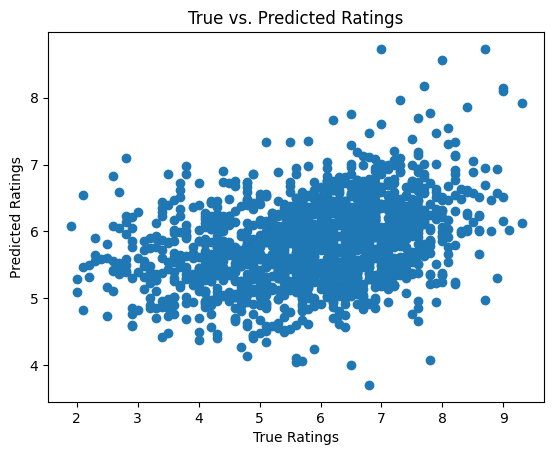

In [29]:
# Visualization
plt.scatter(y_test, y_pred)
plt.xlabel("True Ratings")
plt.ylabel("Predicted Ratings")
plt.title("True vs. Predicted Ratings")
plt.show()


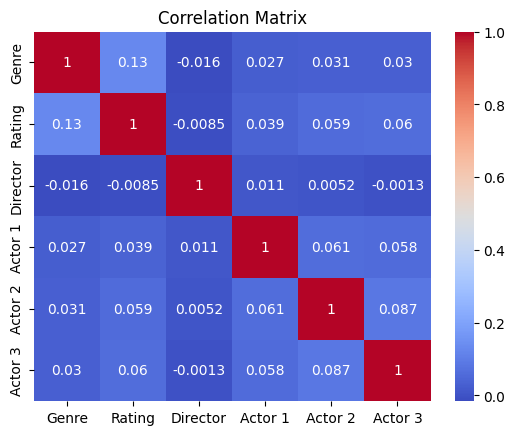

In [30]:
### Correlation Analysis

correlation_matrix = df_movie.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


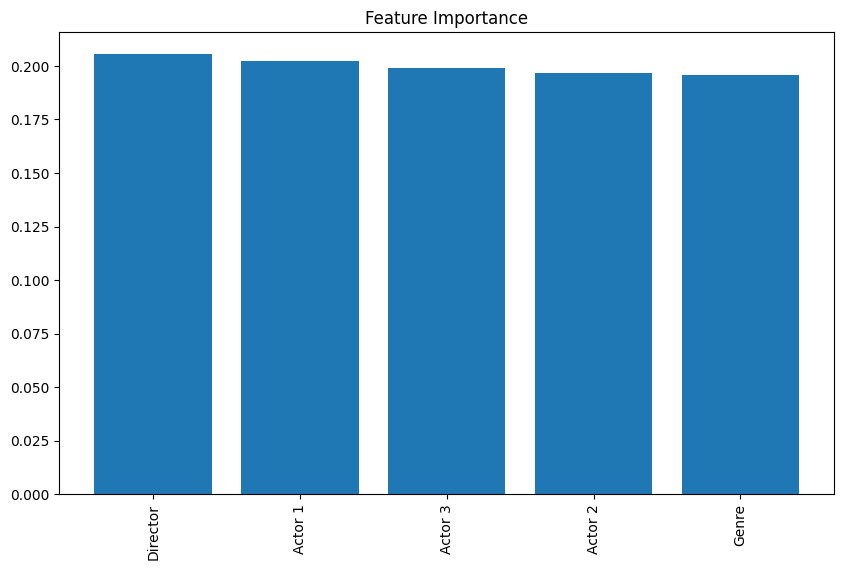

In [31]:
## Features Importance
feature_importances = model.feature_importances_
feature_names = x.columns
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(x.shape[1]), feature_importances[sorted_indices])
plt.xticks(range(x.shape[1]), feature_names[sorted_indices], rotation=90)
plt.title("Feature Importance")
plt.show()


In conclusion, I successfully developed a regression model that can estimate movie ratings based on the provided features. The model achieved a reasonable level of accuracy in predicting ratings, demonstrating its potential utility for decision-making in the entertainment industry.

While working on this task, I gained valuable insights into data preprocessing, feature engineering, model selection, and evaluation techniques. I also learned the importance of dealing with missing data effectively and interpreting the impact of different features on predictive models.

In conclusion, this task provided me with a hands-on opportunity to apply machine-learning techniques to a real-world problem. I'm proud of the progress I've made in building a model that predicts movie ratings and excited to continue honing my skills in data analysis and machine learning.






